In [11]:
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import os.path
from os import path
import math
import xarray as xr
import glob

In [ ]:
#plots from the ASCII files of DNS output
%matplotlib inline
#%matplotlib widget
seedcase=['5micron','gravity','no_solute','5micron_seed','double_seeding','GCCN']#,'gravity_seed','no_solute_seed']
figtag=['Run A','Run B','Run C','Run D1','Run D2','Run D3','Seed-NoTurb','Seed-NoSolu']
ncolor=7#len(N_seed)*len(r_seed)
#color_new = mpl.cm.get_cmap('jet', ncolor)
color_new=plt.cm.gist_ncar(np.linspace(0,1,ncolor))#gist_rainbow#brg
#color_new=plt.cm.jet(np.linspace(0,1,ncolor))#nipy_spectral
#dir='/glade/u/home/sisichen/seeding_cases_link/cc_largedt/'
dir='/glade/u/home/sisichen/seeding_cases_link/condensation_only/'
##supersat one colormap
plt.clf()
fig,ax=plt.subplots(2,3,figsize=(18, 10))
Ra=287
n=0
nature=['5micron','gravity','no_solute']
for (iseedcase,itag) in zip(seedcase,figtag):
    if str(iseedcase)in nature:
        nrad = [341,884,5285,6035, 6070,6079,6088,6091,6092,6093,6094]
        rad=[2.e-6,3.e-6,4.e-6,5.e-6,6.e-6,7.e-6,8.e-6,10.e-6,12.e-6,14.e-6,16.e-6]
    elif str(iseedcase)=='5micron_seed':
        nrad = [341,884,5285,6035, 6070,6079,6088,6091,6092,6093,6094,6796]
        rad=[2.e-6,3.e-6,4.e-6,5.e-6,6.e-6,7.e-6,8.e-6,10.e-6,12.e-6,14.e-6,16.e-6,4.e-6]
    elif str(iseedcase)=='double_seeding':
        nrad = [341,884,5285,6035, 6070,6079,6088,6091,6092,6093,6094,7498]
        rad=[2.e-6,3.e-6,4.e-6,5.e-6,6.e-6,7.e-6,8.e-6,10.e-6,12.e-6,14.e-6,16.e-6,4.e-6]
    elif str(iseedcase)=='GCCN':
        nrad = [341,884,5285,6035, 6070,6079,6088,6091,6092,6093,6094,6796]
        rad=[2.e-6,3.e-6,4.e-6,5.e-6,6.e-6,7.e-6,8.e-6,10.e-6,12.e-6,14.e-6,16.e-6,8.e-6]
    volume=np.power(rad,3)
    lwc0=np.dot(nrad,volume)
    lwc0=lwc0*4./3.*math.pi*1.e3/.165**3
    meanfile=dir+str(iseedcase)+'/RUN06262018.nc'
    dsdfile=dir+str(iseedcase)+'/RUN06262018.dsd'
    figlabel=str(itag)
    if path.exists(meanfile):
        ds_mean=pd.read_csv(meanfile,sep='\s+',index_col=False, header = None, names=\
            ['time','Sp','pp','temp0','thetapp','qvpp','lwc','qvs','rmth','r10'])  
        ds_dsd=pd.read_csv(dsdfile,sep='\s+',index_col=False, header=None)
        rhoa=ds_mean.pp/ds_mean.temp0/(Ra*(1+18/29*ds_mean.qvpp))
        
        nrad=ds_dsd.iloc[:,1:]
        ntot=nrad.sum(axis=1)
        time1=ds_dsd.iloc[:,0]
        rad=np.linspace(1., 100., num=100)
        dup_fact=np.ones((len(time1),1)) 
        rad=dup_fact*rad
        mean_R=np.multiply(rad,nrad)
        meantot_R=mean_R.sum(axis=1)
        meantot_R=np.array(meantot_R)
        meantot_R.shape=[len(meantot_R),1]
        ntot=np.array(ntot)
        ntot.shape=[len(ntot),1]
        mean_R=meantot_R/ntot
        
        sum_R2=np.sum((rad-mean_R)**2*nrad,axis=1)
        sum_R2=np.array(sum_R2)
        sum_R2.shape=[len(sum_R2),1]
        sd_R=np.sqrt(sum_R2/ntot)
        disp_R=sd_R/mean_R
        nrad19=nrad.iloc[:,19:]
        r19=nrad19*(rad[:,19:]/1e6)**3 #m^3
        nrad20=nrad.iloc[:,20:]
        r20=nrad20*(rad[:,20:]/1e6)**3 #m^3
        nrad21=nrad.iloc[:,21:]
        r21=nrad21*(rad[:,21:]/1e6)**3 #m^3
        nrad22=nrad.iloc[:,22:]
        r22=nrad22*(rad[:,22:]/1e6)**3 #m^3
        auto_mass19=r19.sum(axis=1)*4./3.*math.pi*1e6/.165**3#in gram/kg
        auto_mass20=r20.sum(axis=1)*4./3.*math.pi*1e6/.165**3#in gram/kg
        auto_mass21=r21.sum(axis=1)*4./3.*math.pi*1e6/.165**3#in gram/kg
        auto_mass22=r22.sum(axis=1)*4./3.*math.pi*1e6/.165**3#in gram/kg
        
        ds_mean=ds_mean.dropna(thresh=2) #drop N/A
        temp0=ds_mean.temp0
        pp=ds_mean.pp
        qv=ds_mean.qvpp
        Sp=ds_mean.Sp
        Spmax_loc=ds_mean.idxmax().Sp
        Spmin_loc=ds_mean.idxmin().Sp
        lwc=ds_mean.lwc
        qvs=ds_mean.qvs
        time=ds_mean.time
        time_spmax=time[Spmax_loc]
        time_spmin=time[Spmin_loc]
        figlabel=str(itag)
        lwc1=(qv[0]-qv+lwc0)*1e3
        #volume=.165**3
        #mean_R1=lwc1/1e3*volume/(4/3*math.pi*1e3)
        #mean_R1tot=mean_R1
        #mean_R1=mean_R1tot[0::2]
        #mean_R1=np.array(mean_R1)
        #mean_R1.shape=[len(mean_R1),1]
        #mean_R1=mean_R1[:min(len(mean_R1),len(time1))]/ntot[:min(len(mean_R1),len(time1))]
        #mean_R1=mean_R1**(1./3.)*1e6
        ax[0,0].plot(time/60, lwc1,label=figlabel,color=color_new[n])
        ax[0,1].plot(time/60, Sp*100, color=color_new[n])
        ax[0,2].plot(time1/60, mean_R, color=color_new[n])
        ax[1,0].plot(time1/60, disp_R, color=color_new[n])#mean radius not volume mean radius
        #ax[1,1].plot(time1[:min(len(mean_R1),len(time1))]/60, mean_R1, color=color_new[n])#mean r based on LWC
        #ax[1,0].plot(time1/60,auto_mass19*1e3,color=color_new[n])
        ax[1,1].plot(time1/60,auto_mass20,color=color_new[n])
        #ax[1,2].plot(time1/60,auto_mass21*1e3,color=color_new[n])
        #ax[1,3].plot(time1/60,auto_mass22*1e3,color=color_new[n])
        n=n+1
ax[0,0].legend(loc='lower right',bbox_to_anchor=(3, -1))
SMALL_SIZE = 16
OTHER_SIZE = 12
n_ax=range(2)
n_ay=range(3)
for (i,j) in itertools.product(n_ax,n_ay):
    ax[i,j].set_xlim(0,6)
for i in n_ay:
    ax[1,i].set_xlabel('Time(min)')
#ax.set_ylim(0,1)
#ax[0,0].set_xlim(0,6)
#ax.set_xlabel('Time(min)')
ax[0,0].set_ylim(0,1.5)
ax[1,1].set_ylim(0,0.015)
ax[0,0].set_title('LWC(g/kg)')
ax[0,1].set_title('Supersaturation (%)')
ax[0,2].set_title('Mean radius ($\mu m$)')
ax[1,0].set_title('Relative dispersion')
#ax[1,0].set_title('mass of r>19 $\mu m$ (g/kg)')
ax[1,1].set_title('mass of r>20 $\mu m$ (g/kg)')
#ax[1,2].set_title('mass of r>21 $\mu m$ (g/kg)')
#ax[1,3].set_title('mass of r>22 $\mu m$ (g/kg)')

ax[1,2].set_visible(False)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)   
plt.rc('legend', fontsize=SMALL_SIZE)
#figname='mean_Ss.png'
#fig.savefig(figname)
ax[0,0].set_ylabel('lwc')
ax[0,0].yaxis.set_label_coords(-0.2,-0.7)
ax[0,0].xticks([0 1 2 3 4 5 6],['a','b','c','d','e','f','g'])

In [98]:
#plot from droplet netcdf file
n=0
#import droplet data
seedcase=['5micron','gravity','no_solute','5micron_seed','double_seeding','GCCN']#,'gravity_seed','no_solute_seed']
figtag=['Run A','Run B','Run C','Run D1','Run D2','Run D3','Seed-NoTurb','Seed-NoSolu']
time_limit=360
selectcase=seedcase[1:2]
ncolor=7#len(N_seed)*len(r_seed)
#color_new = mpl.cm.get_cmap('jet', ncolor)
color_new=plt.cm.gist_ncar(np.linspace(0,1,ncolor))#gist_rainbow#brg
#color_new=plt.cm.jet(np.linspace(0,1,ncolor))#nipy_spectral
#dir='/glade/u/home/sisichen/seeding_cases_link/condensation_only/'
dir='/glade/u/home/sisichen/scratch/single_precision/cond_only/'
#dir='/glade/u/home/sisichen/seeding_cases_link/cc_largedt/'
#ncfile
rhow=1000.0
vol=16.5e-2**3
rhoa=1.112683792645852
air_mass=rhoa*vol
P0=1.0e5
RaCp=287.0/1004.0
plt.rc('font', size=16)
for (iseedcase,itag) in zip(selectcase,figtag):
    ncdir=dir+str(iseedcase)+'/ncfiles/'
    print(iseedcase)
    ncfilelist=glob.glob(ncdir+'drop*')
    figlabel=str(itag)
    Timeseries=np.empty(shape=0)
    rmean_series=np.empty(shape=0)
    dr3_series=np.empty(shape=0)
    dr3_follow_series=np.empty(shape=0)
    dr3_mean_series=np.empty(shape=0)
    r_follow_series=np.empty(shape=0)
    rmax_series=np.empty(shape=0)
    sp_series=np.empty(shape=0)
    icase=0
    for ncfile in ncfilelist:
        fh = Dataset(ncfile,mode='r')
        #time
        times=fh.variables['TIMES'][:].data
        times=times[0]
        if times<=time_limit:
            #radius
            radius=fh.variables['R'][:].data
            radius_ccn=fh.variables['R_CCN'][:].data
            theta=fh.variables['thetapp'][:].data
            pp=fh.variables['PP'][:].data
            sp=fh.variables['sp'][:].data
            dr3=fh.variables['DR3'][:].data
            #exner=(pp/P0)**RaCp
            #temp=theta*exner
            radius=radius[0,:]
            #radius_ccn=radius_ccn[0,:]
            dr3=dr3[0,:]
            #droplet id
            idp=fh.variables['IDP'][:].data
            idp=idp[0,:]
            if icase==0:
                indrop=int(idp.shape[0]/(64*3))
            #number of maximum allowable droplets in each processor
            ndropmaxindex=np.linspace(0,indrop*64*3,65, dtype = int)
            ndropmaxindex=ndropmaxindex[1:]-1
            #real number of droplets in each processor
            ndropreal=np.array(idp[ndropmaxindex],dtype=int)
            #index of droplets
            idp_index=np.linspace(0,ndropreal[0]-1,ndropreal[0],dtype=int)
            for i in range(63): #i=1,63
                j=i+1
                idp_index=np.append(idp_index,ndropmaxindex[i]+1+np.linspace(0,ndropreal[j]-1,ndropreal[j],dtype=int))
            idp_index=np.ndarray.tolist(idp_index)
            r_dropreal=radius[idp_index]
            #r_dropreal[r_dropreal>50.e-6]=0;
            #rccn_dropreal=radius_ccn[idp_index]
            idp_dropreal=idp[idp_index]
            dr3_dropreal=dr3[idp_index]
            Timeseries=np.append(Timeseries,times)
            #statistics
            rmean=r_dropreal.mean()
            dr3_mean=dr3_dropreal.mean()
            rmax=r_dropreal.max()
#            if icase==0:
            idloc_rmax=np.where(r_dropreal == rmax)#find the location of r_max in r_dropreal
            id_follow=idp_dropreal[idloc_rmax]#find corresponding idp in idp_dropreal        
            if len(id_follow)>1:
                id_follow=id_follow[-1]
            id_follow=int(id_follow)
            id_follow=np.where(idp_dropreal == id_follow)#find location of the global idp in idp_dropreal
            icase=icase+1
            r_follow=r_dropreal[id_follow]
            r_follow_series=np.append(r_follow_series,r_follow)
            #rccn_follow=rccn_dropreal[id_follow]
            #rccn_follow_series=np.append(rccn_follow_series,rccn_follow)
            dr3_follow=dr3_dropreal[id_follow]
            dr3_follow_series=np.append(dr3_follow_series,dr3_follow)
            #r2mean=r_dropreal**2
            #r2mean=r2mean.mean()
            #r3mean=r_dropreal**3
            #r3mean=r3mean.mean()
            #curv_follow=2.0*7.61e-2/(476*1000.0*temp*r_follow)
            #solu_follow=2.0*18.0/132.14*1726.0*rccn_follow**3/1000.0
            #seq_follow=math.exp(curv_follow-solu_follow/(r_follow**3-rccn_follow**3))-1.0
            #r_var=np.var(r_dropreal)
            #disp=math.sqrt(r_var)/rmean
            #r19=r_dropreal[r_dropreal>19e-6];
            #r30=r_dropreal[r_dropreal>30e-6];
            #r21=r_dropreal[r_dropreal>21e-6];
            #mass=sum(r_dropreal**3)*4/3*math.pi*rhow
            #lwc=mass/air_mass
            #mass30=sum(r30**3)*4/3*math.pi*rhow
            #mass30=mass30/air_mass
            rmax_series=np.append(rmax_series,rmax)
            #mass30_series=np.append(mass30_series,mass30)
            #lwc_series=np.append(lwc_series,lwc)
            rmean_series=np.append(rmean_series,rmean)
            dr3_mean_series=np.append(dr3_mean_series,dr3_mean)
            #disp_series=np.append(disp_series,disp)
            sp_series=np.append(sp_series,sp)
    time_ascen_index=sorted(range(len(Timeseries)), key=lambda k: Timeseries[k]) #sort out the timeseries in ascending order
    #mass30_ascen=mass30_series[time_ascen_index]
    times_ascen=Timeseries[time_ascen_index]
    #total_ntime=times_ascen.shape[0]
    #auto_conversion=np.zeros(total_ntime)
    
print('done')

gravity
done


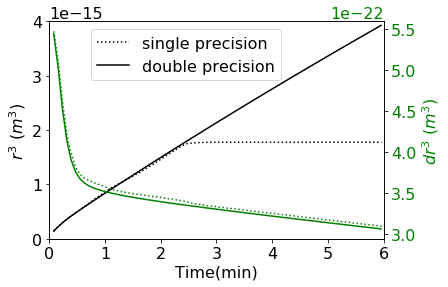

In [104]:
#plot double yaxis plots on the r^3 and \Delta{r^3}
fig,ax1=plt.subplots()
lns1=ax1.plot(Timeseries[time_ascen_index][1:]/60, rmean_series[time_ascen_index][1:]**3,'k:',label='single precision')
lns2=ax1.plot(time_new, rmean_new,'k',label='double precision')

ax2 = ax1.twinx() 
lns3=ax2.plot(Timeseries[time_ascen_index][1:]/60, dr3_mean_series[time_ascen_index][1:],'g:',label='single precision $dr^3$')
lns4=ax2.plot(time_new, dr3_new,'g',label='double precision $dr^3$')
lns = lns1+lns2+lns3+lns4
ax1.set_ylabel('$R^3 \ (m^3)$', fontsize=16)
ax2.set_ylabel('$dR^3\ (m^3)$', fontsize=16,color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax1.set_xlabel('Time(min)')
ax1.set_xlim(0,6)
ax1.set_ylim(0,4.e-15)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='upper left',bbox_to_anchor=(1.2, 1))
ax1.legend( loc='upper left',bbox_to_anchor=(0.1, 1))

In [100]:
time_old=Timeseries[time_ascen_index][1:]/60
rmean_old=rmean_series[time_ascen_index][1:]**3
dr3_old=dr3_mean_series[time_ascen_index][1:]

In [81]:
#time_new=Timeseries[time_ascen_index][1:]/60
#rmean_new=rmean_series[time_ascen_index][1:]**3
#dr3_new=dr3_mean_series[time_ascen_index][1:]

In [8]:
2**(-11)

0.00048828125

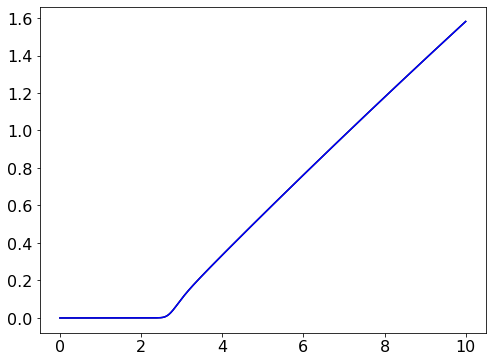

In [24]:
#analyze the droplet statistics of the parcel model
#please switch the branch to 
pdir='/glade/u/home/sisichen/work_dir/projects_results/seeding_cases/parcel/'
casename='new'
dsdfile=pdir+casename+'.dsd'
radfile=pdir+casename+'.rad'
outfile=pdir+casename+'.out'
dsd_data=pd.read_csv(dsdfile,sep='\s+',index_col=False, header = None)
rad_data=pd.read_csv(radfile,sep='\s+',index_col=False, header = None)
mean_data=pd.read_csv(outfile,sep='\s+',index_col=False, header = None, names=\
#        ['time','H','Sp','lwc','pp','temp','thetapp','qvpp','qvs','rm','rhoa',\
#         'deltaqp'])
         ['time','H','Sp','ndrop','pp','temp','thetapp','qvpp','qvs','rm','rhoa',\
          'deltaqp'])
Time=mean_data.time
H=mean_data.H
Sp=mean_data.Sp
spmax=Sp.max()
#lwc=mean_data.lwc
pp=mean_data.pp
temp=mean_data.temp
theta=mean_data.thetapp
qv=mean_data.qvpp
qvs=mean_data.qvs
rm=mean_data.rm
deltaqp=mean_data.deltaqp
cloud_base=mean_data.iloc[(mean_data['Sp'] - 0).abs().argsort()[:1]]
dsd_Cb=dsd_data.iloc[(dsd_data.loc[:,0]-cloud_base.time.item()).abs().argsort()[:1]] 
#first colume=time
#at maximum sp
max_sp=mean_data.iloc[(mean_data['Sp']-spmax).abs().argsort()[:1]]
dsd_maxsp=dsd_data.iloc[(dsd_data.loc[:,0]-max_sp.time.item()).abs().argsort()[:1]] 
#first colume=time
rad_maxsp=rad_data.iloc[(rad_data.loc[:,0]-max_sp.time.item()).abs().argsort()[:1]]

rad_dry = rad_data.iloc[(rad_data.loc[:,0]).abs().argsort()[:1]]
#for tt in Time:
#plot
fig,ax=plt.subplots(figsize=(8, 6))
A=4/3*math.pi*1000*rad_data.loc[:,3:]**3*dsd_data.loc[:,3:]/(1e-6)
LWC=A.sum(axis=1)
ax.plot(Time/60,LWC*1e3,'k')
ax.plot(Time/60,(qv[0]-qv)*1e3,'b')
#ax.plot(Time/60,lwc*1e3,'r--')
#ax.set_ylim(0,0.5)
#ax.set_xlim(2, 6)


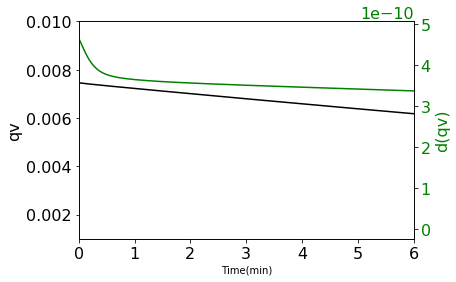

In [10]:
fig,ax1=plt.subplots()
ax1.plot(Time/60-3,qv,'k',label='$r^3$')
ax2 = ax1.twinx() 
ax2.plot(Time/60-3,deltaqp,'g',label='qv')
ax1.set_ylabel('qv', fontsize=16)
ax2.set_ylabel('d(qv)', fontsize=16,color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax1.set_xlabel('Time(min)')
ax1.set_xlim(0,6)
ax1.set_ylim(1e-3,1e-2)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

(0, 3)

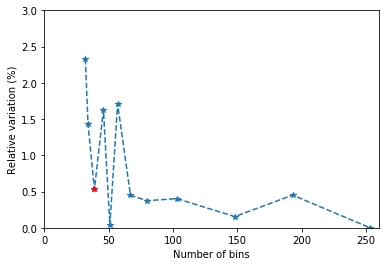

In [30]:
noactivate=np.array([22.86,21.86,19.658,22.073,20.29,18.332,19.747,19.831,20.701,20.077,19.7449948,20.25])
A=np.abs((noactivate-20.25)/112)
nbins=[32,34,39,46,51,57,67,80,103,148,193,253]
fig,ax=plt.subplots()
ax.plot(nbins,A*100,'--*')
ax.plot(39,A[2]*100,'r*')
ax.set_xlabel('Number of bins')
ax.set_ylabel('Relative variation (%)')
ax.set_xlim(0,260)
ax.set_ylim(0,3)

Text(0, 0.5, 'Number of unactivated aerosol')

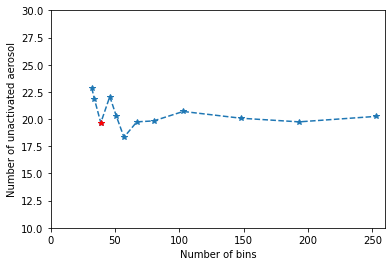

In [36]:
#sensitivity on the spectrum resolution of the dry aerosol size
nbins=[32,34,39,46,51,57,67,80,103,148,193,253]
noactivate=[22.86,21.86,19.658,22.073,20.29,18.332,19.747,19.831,20.701,20.077,19.7449948,20.25,]
fig,ax=plt.subplots()
ax.plot(nbins,noactivate,'--*')
ax.plot(39,19.658,'r*')
ax.set_ylim(10,30)
ax.set_xlim(0,260)
ax.set_xlabel('Number of bins')
ax.set_ylabel('Number of unactivated aerosol')